In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_canada = pd.read_excel(r"C:\Users\Hp\Canada.xlsx", sheet_name="Canada by Citizenship", skiprows=range(20), skipfooter=2)
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
df_canada['Type'].unique()

array(['Immigrants'], dtype=object)

In [4]:
df_canada['Coverage'].value_counts()

Foreigners    194
Citizens        1
Name: Coverage, dtype: int64

In [5]:
df_canada = df_canada.drop(columns=['Type', 'Coverage', 'AREA', 'REG', 'DEV'])

In [6]:
df_canada = df_canada.rename(columns={
    "OdName" : "Country",
    "AreaName" : "Continent",
    "RegName" : "Region"
})

df_canada.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
df_canada['Total'] = df_canada.sum(axis=1)
df_canada.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [8]:
df_canada[['Country', 1980, 2013]]

,Country,1980,2013
0,Afghanistan,16,2004
1,Albania,1,603
2,Algeria,80,4331
3,American Samoa,0,0
4,Andorra,0,1
...,...,...,...
190,Viet Nam,1191,2112
191,Western Sahara,0,0
192,Yemen,1,217
193,Zambia,11,59


In [9]:
df_canada.Country.nunique()

# setiap nilai di field country adalah unik. Bisa dijadikan index aja

195

In [10]:
df_canada = df_canada.set_index("Country")

In [11]:
# ilangin nama index karena nggak penting

df_canada.index.name = None

In [12]:
df_canada

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [13]:
df_canada.loc[["Indonesia", "Japan"], range(1980,1991)]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
Indonesia,186,178,252,115,123,100,127,213,270,260,227
Japan,701,756,598,309,246,198,248,422,324,494,379


In [14]:
list_year = list(range(1980,2014))

In [15]:
df_canada.loc[["Indonesia", "Japan", "Afghanistan"], list_year[10:21]]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
Indonesia,227,252,243,278,262,205,231,166,165,525,1138
Japan,379,506,605,907,956,826,994,924,897,1083,1010
Afghanistan,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326


In [16]:
df_canada.Region.unique()

array(['Southern Asia', 'Southern Europe', 'Northern Africa', 'Polynesia',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Southern Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Central Asia',
       'Micronesia'], dtype=object)

In [17]:
df_canada_sea = df_canada[df_canada['Region']=='South-Eastern Asia']

In [18]:
df_canada_sea.drop(columns=['Continent', 'Region'])

,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Brunei Darussalam,Developing regions,79,6,8,2,2,4,12,16,103,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Developing regions,12,19,26,33,10,7,8,14,15,...,370,529,460,354,203,200,196,233,288,6538
Indonesia,Developing regions,186,178,252,115,123,100,127,213,270,...,632,613,657,661,504,712,390,395,387,13150
Lao People's Democratic Republic,Developing regions,11,6,16,16,7,17,21,20,22,...,42,74,53,32,39,54,22,25,15,1089
Malaysia,Developing regions,786,816,813,448,384,374,425,817,2072,...,593,580,600,658,640,802,409,358,204,24417
Myanmar,Developing regions,80,62,46,31,41,23,18,33,55,...,210,953,1887,975,1153,556,368,193,262,9245
Philippines,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Singapore,Developing regions,241,301,337,169,128,139,205,372,808,...,392,298,690,734,366,805,219,146,141,14579
Thailand,Developing regions,56,53,113,65,82,66,78,117,147,...,575,500,487,519,512,499,396,296,400,9174
Viet Nam,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146


In [19]:
df_canada_sea.DevName.unique()

array(['Developing regions'], dtype=object)

In [20]:
df_canada_sea = df_canada_sea.drop(columns=['Continent', 'Region', 'DevName'])
df_canada_sea.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Brunei Darussalam,79,6,8,2,2,4,12,16,103,63,...,4,5,11,10,5,12,6,3,6,600
Cambodia,12,19,26,33,10,7,8,14,15,27,...,370,529,460,354,203,200,196,233,288,6538
Indonesia,186,178,252,115,123,100,127,213,270,260,...,632,613,657,661,504,712,390,395,387,13150
Lao People's Democratic Republic,11,6,16,16,7,17,21,20,22,44,...,42,74,53,32,39,54,22,25,15,1089
Malaysia,786,816,813,448,384,374,425,817,2072,2346,...,593,580,600,658,640,802,409,358,204,24417


In [21]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [22]:
plt.style.use('fivethirtyeight')

In [23]:
haiti = df_canada.loc['Haiti', list_year]

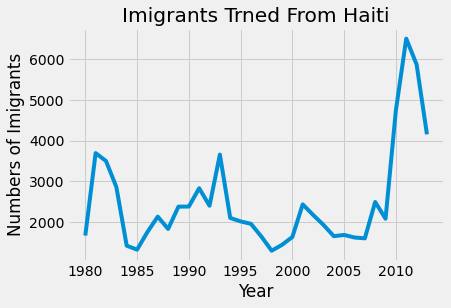

In [24]:
haiti.plot()

plt.title('Imigrants Trned From Haiti')
plt.xlabel('Year')
plt.ylabel('Numbers of Imigrants')

plt.show()

In [25]:
china_india = df_canada.loc[['China','India'], list_year]

In [26]:
china_india = china_india.transpose()

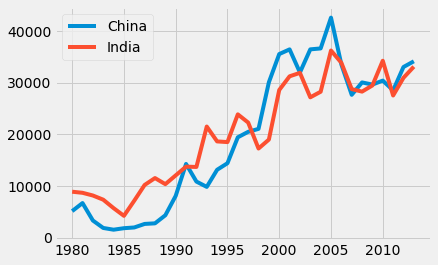

In [27]:
china_india.plot()
plt.show()

In [28]:
top5_countries = df_canada.sort_values(by='Total', ascending=False).head()
top5_countries

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [29]:
top5_countries = top5_countries.drop(columns=['Continent', 'Region', 'DevName'])
top5_countries = top5_countries.T
top5_countries.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [30]:
top5_countries

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [31]:
#top5_countries.plot(
#    kind='area',
#    figsize=(20,10)
#)

#plt.title("Top 5 Immigrants Country")
#plt.ylabel("Numbers of Immigrants")
#plt.xlabel("Years")
#plt.show()

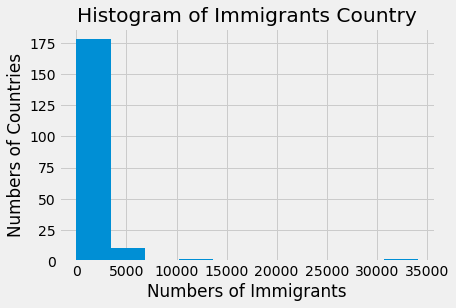

In [32]:
df_canada[2013].plot(
    kind='hist'
)

plt.title("Histogram of Immigrants Country")
plt.ylabel("Numbers of Countries")
plt.xlabel("Numbers of Immigrants")
plt.show()

In [33]:
den_nor_swd = df_canada.loc[['Denmark', 'Norway', 'Sweden'], list_year].T
den_nor_swd.head()

,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


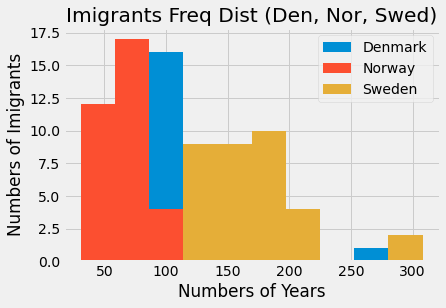

In [34]:
den_nor_swd.plot(
    kind='hist'
)

plt.title("Imigrants Freq Dist (Den, Nor, Swed)")
plt.ylabel("Numbers of Imigrants")
plt.xlabel("Numbers of Years")
plt.show()

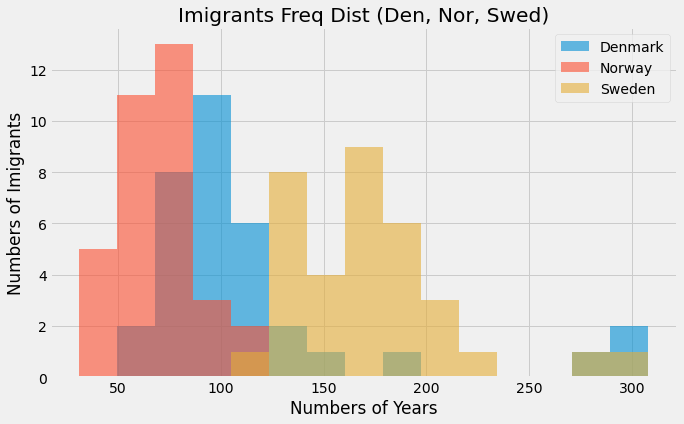

In [35]:
den_nor_swd.plot(
    kind='hist',
    figsize=(10,6),
    bins=15,
    alpha=.6
)

plt.title("Imigrants Freq Dist (Den, Nor, Swed)")
plt.ylabel("Numbers of Imigrants")
plt.xlabel("Numbers of Years")
plt.show()

In [36]:
indonesia = df_canada.loc['Indonesia', list_year]
indonesia.head()

1980    186
1981    178
1982    252
1983    115
1984    123
Name: Indonesia, dtype: object

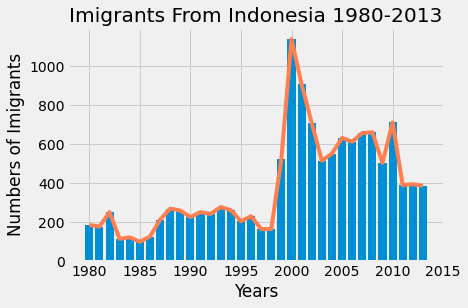

In [37]:
# indonesia.plot(
#    kind='bar',
#    figsize=(15,7)
#)
plt.plot(
    list_year,
    indonesia,
    c='coral'
)

plt.bar(
    list_year,
    indonesia
) 

# harus langsung dr marplotlib buat mau plot 2 grafik langsung

plt.title("Imigrants From Indonesia 1980-2013")
plt.ylabel("Numbers of Imigrants")
plt.xlabel("Years")
plt.show()

In [38]:
top15_countries = df_canada.sort_values(by='Total', ascending=False).head(15)
top15_countries = top15_countries['Total']
top15_countries.head()

India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
Name: Total, dtype: int64

Text(0, 0.5, 'Country')

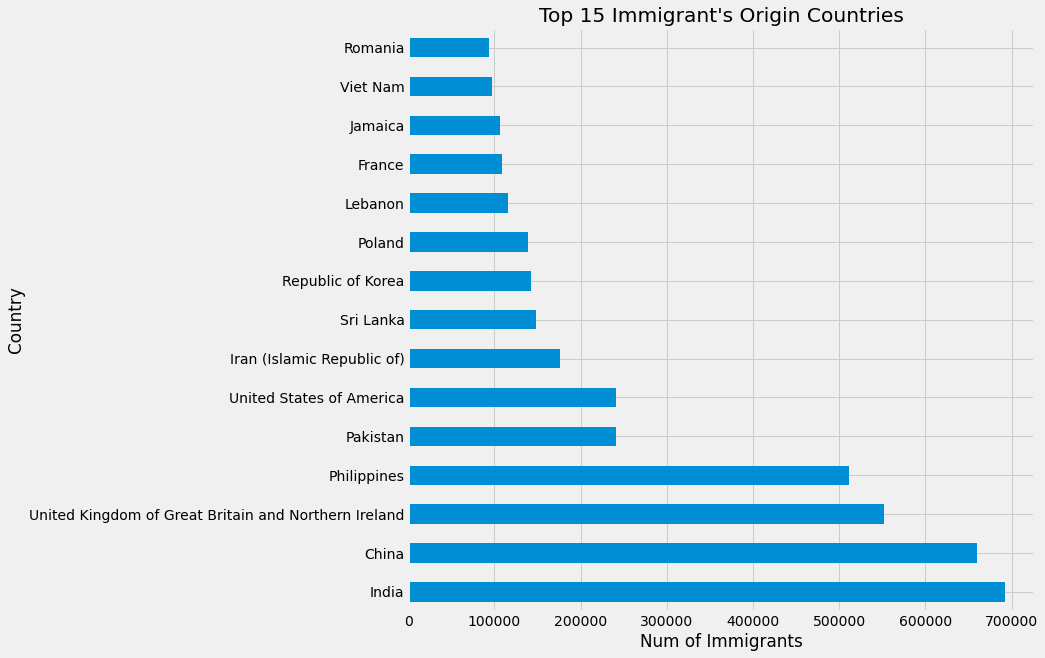

In [39]:
top15_countries.plot(kind="barh", figsize=(10,10))
plt.title("Top 15 Immigrant's Origin Countries")
plt.xlabel('Num of Immigrants')
plt.ylabel('Country')

In [40]:
continents = df_canada.groupby("Continent").sum()

In [41]:
continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


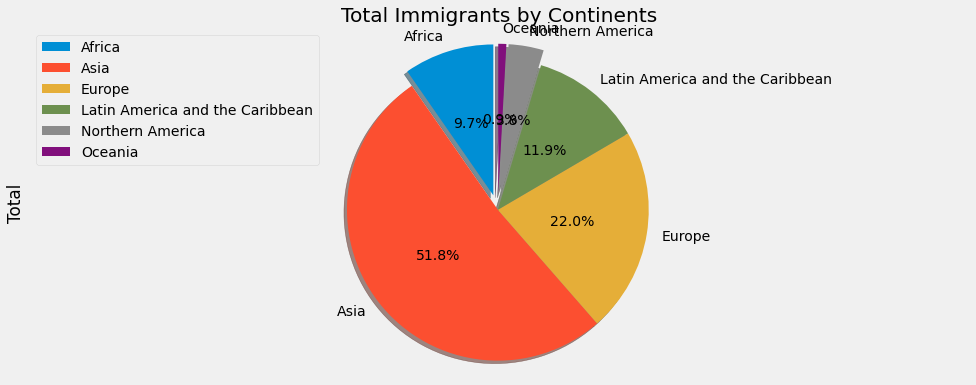

In [56]:
explode_list = [.1, 0, 0, 0, .1, .1]
continents['Total'].plot(
    kind="pie",
    figsize=(15,6),
    autopct='%.1f%%',
    startangle=90,
    shadow=True,
    label=None,
    pctdistance=0.5,
    explode=explode_list
)
plt.title('Total Immigrants by Continents')
plt.axis('equal')
plt.legend(labels=continents.index, loc='upper left')
plt.show()

In [43]:
df_japan = df_canada.loc["Japan", list_year]
df_japan.head()

1980    701
1981    756
1982    598
1983    309
1984    246
Name: Japan, dtype: object

Text(0, 0.5, 'Number of Immigrants')

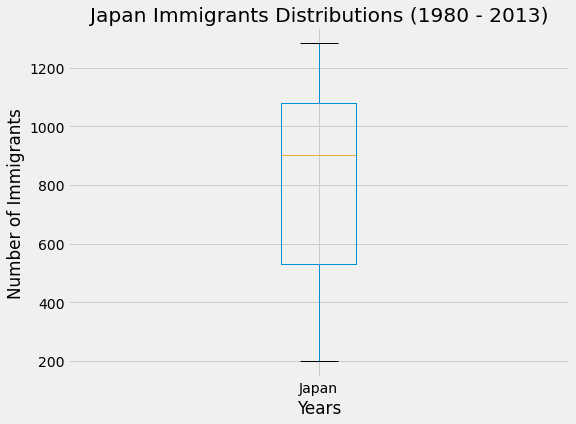

In [44]:
df_japan.plot(
    kind="box",
    figsize=(8,6)
)

plt.title("Japan Immigrants Distributions (1980 - 2013)")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")

Text(0, 0.5, 'Number of Immigrants')

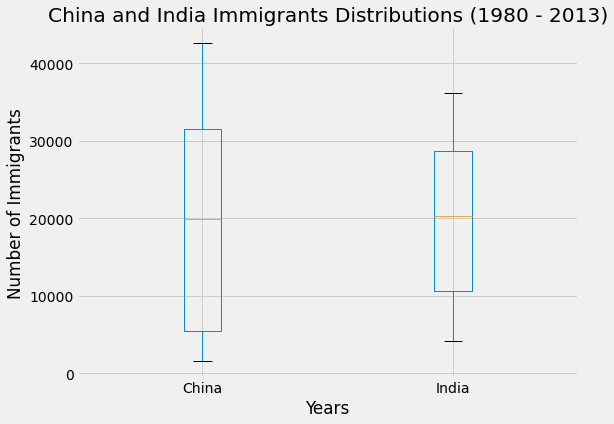

In [45]:
china_india.plot(
    kind="box",
    figsize=(8,6)
)

plt.title("China and India Immigrants Distributions (1980 - 2013)")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")

Text(0, 0.5, 'Number of Immigrants')

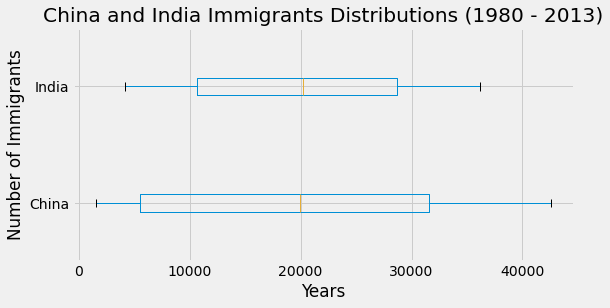

In [46]:
china_india.plot(
    kind="box",
    figsize=(8,4),
    vert=False
)

plt.title("China and India Immigrants Distributions (1980 - 2013)")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")

In [47]:
df_canada[list_year].head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [48]:
df_total = pd.DataFrame(df_canada[list_year].sum())

In [49]:
df_total.index

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype='object')

In [50]:
# convert index dari string ke integer
df_total.index = map(int, df_total.index)

In [51]:
df_total.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

In [52]:
## scatter plot harus ada 2 kolom, x dan y. kolom x var indp, y var dep
## reset index biar index jadi kolom di dataframe

df_total = df_total.reset_index()
df_total.head()

,index,0
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [53]:
df_total.columns = ['year', 'total']
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Text(0, 0.5, 'Total Immigrants')

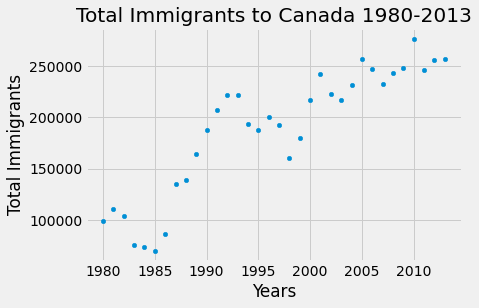

In [54]:
df_total.plot(kind='scatter', x='year', y='total', figsize = (6,4))

plt.title("Total Immigrants to Canada 1980-2013")
plt.xlabel("Years")
plt.ylabel("Total Immigrants")